In [184]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [185]:
basket=pd.read_csv(r"/Users/hectorrr/proyectos/basket market/dataset/Assignment-1_Data.csv", delimiter=";", dtype={0: str})
print(basket.shape)
basket['Price'] = pd.to_numeric(basket['Price'], errors='coerce')
basket["Date"]=pd.to_datetime(basket["Date"],format="%d.%m.%Y %H:%M")
print(basket["Date"].min())
print(basket["Date"].max())
basket["Price"]=basket["Price"].replace({",":"."}, regex=True)
basket["Price"]=basket["Price"].astype(float)
basket["año_mes"] = basket["Date"].dt.to_period("M")
print(basket.shape)
basket.head(5)

(522064, 7)
2010-12-01 08:26:00
2011-12-09 12:50:00
(522064, 8)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,año_mes
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12


In [186]:
basket.BillNo.value_counts()

BillNo
573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
561086       1
554063       1
561082       1
569647       1
561895       1
Name: count, Length: 21663, dtype: int64

In [187]:
basket.isna().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price         517898
CustomerID    134041
Country            0
año_mes            0
dtype: int64

In [188]:
basket.describe()

,Quantity,Date,Price,CustomerID
count,522064.000000,522064,4166.000000,388023.000000
mean,10.090435,2011-07-04 12:51:20.777107456,15.576812,15316.931710
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 10:15:00,0.000000,13950.000000
50%,3.000000,2011-07-20 08:59:00,0.000000,15265.000000
75%,10.000000,2011-10-19 14:12:00,18.000000,16837.000000
max,80995.000000,2011-12-09 12:50:00,2500.000000,18287.000000
std,161.110525,NaN,72.621694,1721.846964


In [189]:
basket["date_short"]=basket.groupby('BillNo')['Date'].transform('min').dt.date
basket["date_short"]=pd.to_datetime(basket["date_short"],format="%d-%m-%Y")
basket

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,año_mes,date_short
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01
...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,NaN,12680.0,France,2011-12,2011-12-09
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,NaN,12680.0,France,2011-12,2011-12-09
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,NaN,12680.0,France,2011-12,2011-12-09
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,NaN,12680.0,France,2011-12,2011-12-09


In [190]:
count_nunique_bills=basket.groupby(["date_short","Country"]).agg({"BillNo":"nunique"}).reset_index()
count_nunique_bills

,date_short,Country,BillNo
0,2010-12-01,Australia,1
1,2010-12-01,France,1
2,2010-12-01,Germany,1
3,2010-12-01,Netherlands,1
4,2010-12-01,Norway,1
...,...,...,...
1288,2011-12-09,Belgium,1
1289,2011-12-09,France,1
1290,2011-12-09,Germany,4
1291,2011-12-09,Norway,2


In [191]:
agrupado=basket.groupby(["año_mes"]).sum("Price").reset_index()
agrupado["año_mes"] = agrupado["año_mes"].dt.to_timestamp()
agrupado

,año_mes,Quantity,Price,CustomerID
0,2010-12-01,349785,6110.0,399558799.0
1,2011-01-01,378849,4405.0,318587449.0
2,2011-02-01,271019,2941.0,297576148.0
3,2011-03-01,341075,5699.0,398513873.0
4,2011-04-01,297659,4264.0,340635347.0
5,2011-05-01,377135,4230.0,422654405.0
6,2011-06-01,331965,4803.0,404186251.0
7,2011-07-01,372133,2598.0,398601348.0
8,2011-08-01,405136,7511.0,400320070.0
9,2011-09-01,531240,5227.0,593034554.0


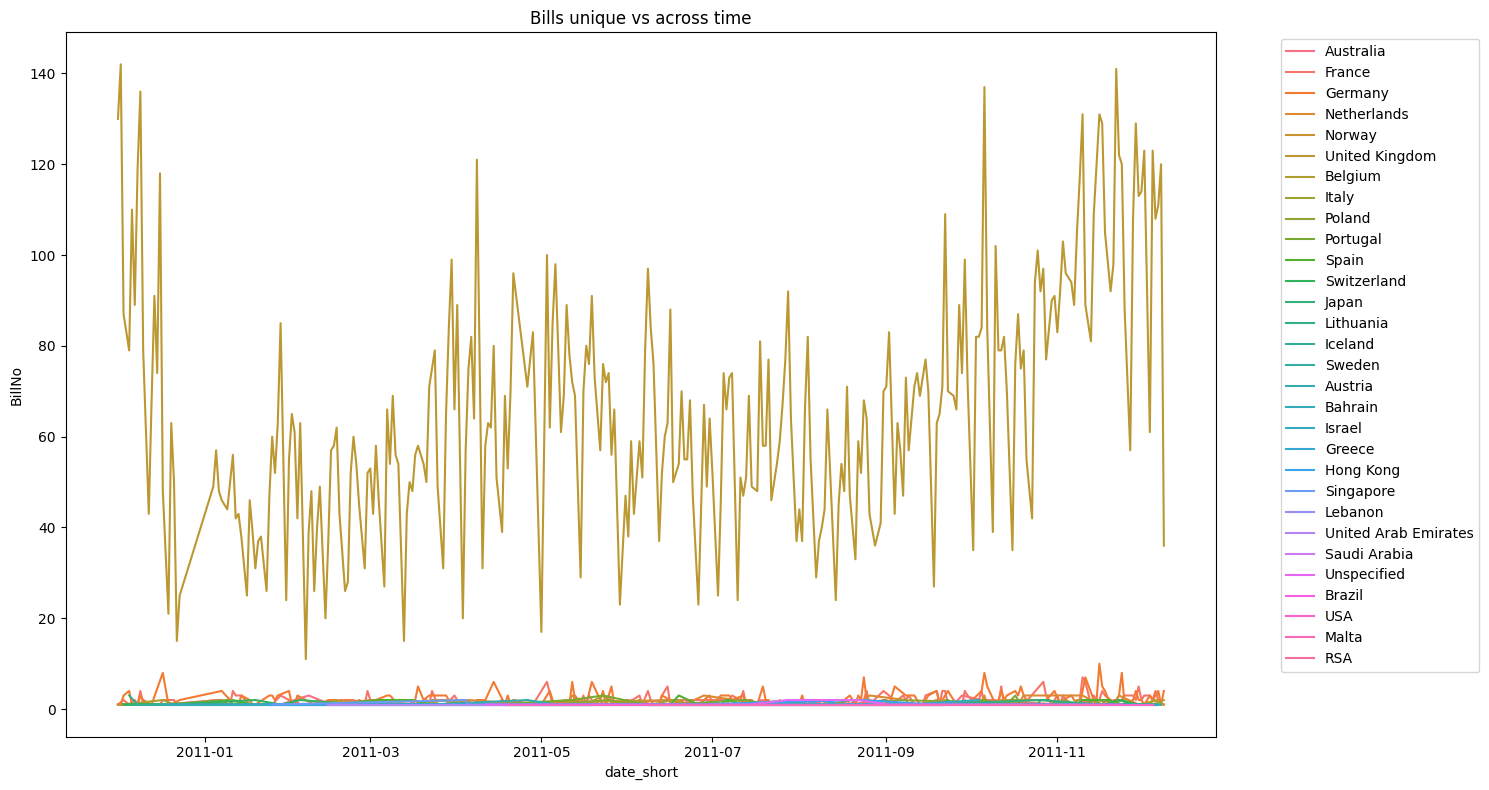

In [192]:
plt.figure(figsize=(15,8))
sns.lineplot(data=count_nunique_bills,x="date_short", y="BillNo", hue="Country")
plt.title("Bills unique vs across time")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

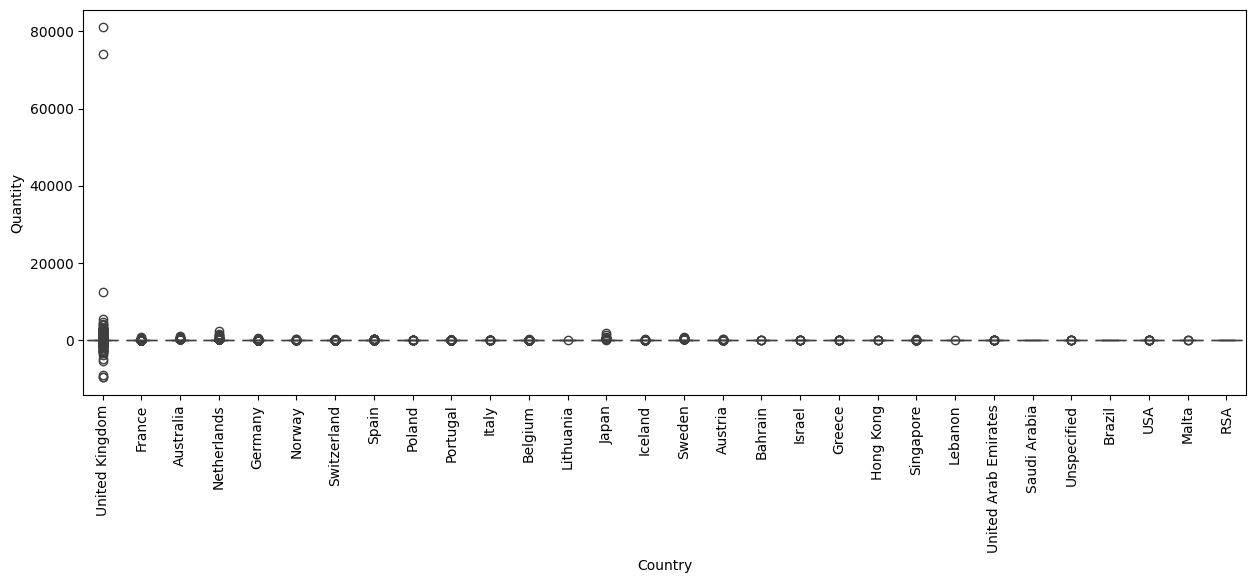

In [193]:
plt.figure(figsize=(15,5))
sns.boxplot(data=basket, x="Country", y="Quantity")
plt.xticks(rotation=90)
plt.show()

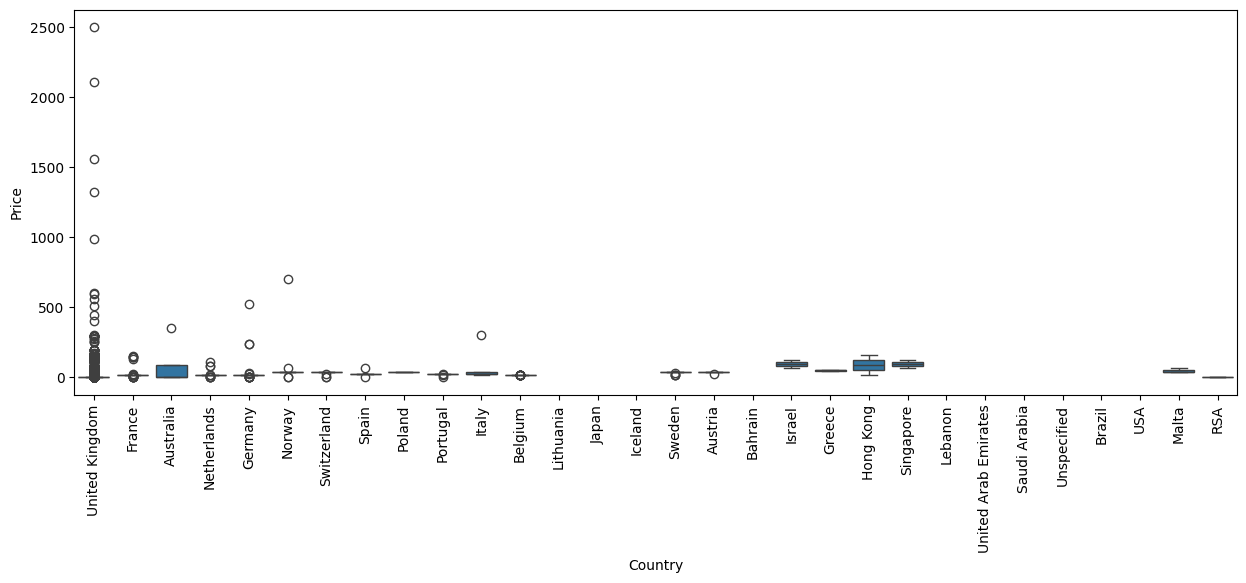

In [194]:
plt.figure(figsize=(15,5))
sns.boxplot(data=basket, x="Country", y="Price")
plt.xticks(rotation=90)
plt.show()

In [195]:
basket["Itemname"].value_counts()

Itemname
WHITE HANGING HEART T-LIGHT HOLDER     2269
JUMBO BAG RED RETROSPOT                2087
REGENCY CAKESTAND 3 TIER               1930
PARTY BUNTING                          1677
LUNCH BAG RED RETROSPOT                1570
                                       ... 
FOOD COVER WITH BEADS , SET 2 SIZES       1
POLYESTER FILLER PAD 60x40cm              1
damages/credits from ASOS.                1
samples                                   1
PAPER CRAFT , LITTLE BIRDIE               1
Name: count, Length: 4185, dtype: int64

In [196]:
le = LabelEncoder()
basket["Itemname_numeric"] = le.fit_transform(basket["Itemname"])
decode_map = dict(zip(le.transform(le.classes_), le.classes_))
basket.head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,año_mes,date_short,Itemname_numeric
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01,3882
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01,3890
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01,897
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01,1886
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,NaN,17850.0,United Kingdom,2010-12,2010-12-01,2880


In [197]:
basket_fil=basket[["BillNo","Itemname_numeric"]]

In [198]:
basket_prep = pd.crosstab(basket_fil["BillNo"], basket_fil["Itemname_numeric"])
basket_prep = basket_prep.applymap(lambda x: 1 if x > 0 else 0)
basket_prep

/var/folders/yy/96lybxj936qb335xw_h5yd5m0000gn/T/ipykernel_6732/528994630.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_prep = basket_prep.applymap(lambda x: 1 if x > 0 else 0)


Itemname_numeric,0,1,2,3,4,5,6,7,8,9,...,4176,4177,4178,4179,4180,4181,4182,4183,4184,4185
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Soporte mínimo = filtra conjuntos de ítems poco frecuentes (garantiza relevancia en el dataset).

Confianza mínima = filtra reglas débiles (garantiza que la relación A → B tenga sentido).

In [199]:
frequent_items = apriori(basket_prep, min_support=0.03, use_colnames=True)
#frequent_items
# Generar reglas con confianza mínima de 0.7
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.55)
print(rules[["antecedents", "consequents", "support", "confidence", "lift"]])

/Users/hectorrr/proyectos/.venv/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


  antecedents consequents   support  confidence       lift
0      (2981)      (1582)  0.033744    0.721619  16.033263
1      (1582)      (2981)  0.033744    0.749744  16.033263
2      (1840)      (1842)  0.037806    0.676301   7.098207
3      (1853)      (1842)  0.031205    0.579760   6.084951
4      (1855)      (1842)  0.033283    0.612054   6.423902


In [200]:
21655*0.033

714.615

In [201]:
convert_laber=rules[["antecedents", "consequents", "support", "confidence", "lift"]].copy()
convert_laber.head(5)

,antecedents,consequents,support,confidence,lift
0,(2981),(1582),0.033744,0.721619,16.033263
1,(1582),(2981),0.033744,0.749744,16.033263
2,(1840),(1842),0.037806,0.676301,7.098207
3,(1853),(1842),0.031205,0.579760,6.084951
4,(1855),(1842),0.033283,0.612054,6.423902


In [202]:
def decode_itemset(itemset):
    return [decode_map[i] for i in itemset]

convert_laber["antecedents"] = convert_laber["antecedents"].apply(decode_itemset).copy()
convert_laber["consequents"] = convert_laber["consequents"].apply(decode_itemset).copy()
convert_laber

,antecedents,consequents,support,confidence,lift
0,[ROSES REGENCY TEACUP AND SAUCER],[GREEN REGENCY TEACUP AND SAUCER],0.033744,0.721619,16.033263
1,[GREEN REGENCY TEACUP AND SAUCER],[ROSES REGENCY TEACUP AND SAUCER],0.033744,0.749744,16.033263
2,[JUMBO BAG PINK POLKADOT],[JUMBO BAG RED RETROSPOT],0.037806,0.676301,7.098207
3,[JUMBO SHOPPER VINTAGE RED PAISLEY],[JUMBO BAG RED RETROSPOT],0.031205,0.579760,6.084951
4,[JUMBO STORAGE BAG SUKI],[JUMBO BAG RED RETROSPOT],0.033283,0.612054,6.423902
